# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set units
units = 'metric'

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | darchula
Processing Record 2 of Set 1 | santo antonio
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | dongsheng
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | tayu
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | nogliki
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | luau
Processing Record 17 of Set 1 | valka
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | paulden
Processing Record 22 of Set 1 | ushuaia
Processing Record 2

Processing Record 38 of Set 4 | mboursou lere
Processing Record 39 of Set 4 | bereznik
Processing Record 40 of Set 4 | bichura
Processing Record 41 of Set 4 | barrow in furness
Processing Record 42 of Set 4 | casper
Processing Record 43 of Set 4 | carutapera
Processing Record 44 of Set 4 | molteno
Processing Record 45 of Set 4 | caarapo
Processing Record 46 of Set 4 | petropavlovka
Processing Record 47 of Set 4 | tromso
Processing Record 48 of Set 4 | lospalos
Processing Record 49 of Set 4 | puerto armuelles
Processing Record 0 of Set 5 | atafu village
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | broken hill
Processing Record 3 of Set 5 | talavera
Processing Record 4 of Set 5 | abalak
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | tsaratanana
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | homer
Processing Record 9 of Set 5 | labrador city
Processing Record 10 of Set 5 | machico
Processing Record 11 of 

Processing Record 32 of Set 8 | kone
Processing Record 33 of Set 8 | seven pagodas
Processing Record 34 of Set 8 | merizo village
Processing Record 35 of Set 8 | igarka
Processing Record 36 of Set 8 | puerto quijarro
Processing Record 37 of Set 8 | umba
Processing Record 38 of Set 8 | hell-ville
Processing Record 39 of Set 8 | fannuj
City not found. Skipping...
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | xining
Processing Record 42 of Set 8 | mount pearl
Processing Record 43 of Set 8 | bamboo flat
Processing Record 44 of Set 8 | gao
Processing Record 45 of Set 8 | skovorodino
Processing Record 46 of Set 8 | santa ana de yacuma
Processing Record 47 of Set 8 | miri
Processing Record 48 of Set 8 | gadzhiyevo
Processing Record 49 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 0 of Set 9 | ugoofaaru
Processing Record 1 of Set 9 | yuncheng
Processing Record 2 of Set 9 | nebraska city
Processing Record 3 of Set 9 | khorramabad
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,darchula,29.8412,80.5287,283.17,21,0,6.12,NP,1707681491
1,santo antonio,-6.3106,-35.4789,303.03,60,89,6.83,BR,1707681491
2,mount gambier,-37.8333,140.7667,284.77,96,1,0.96,AU,1707681257
3,dongsheng,39.8161,109.9776,266.50,66,1,3.19,CN,1707681491
4,waitangi,-43.9535,-176.5597,285.27,74,100,1.34,NZ,1707681491


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

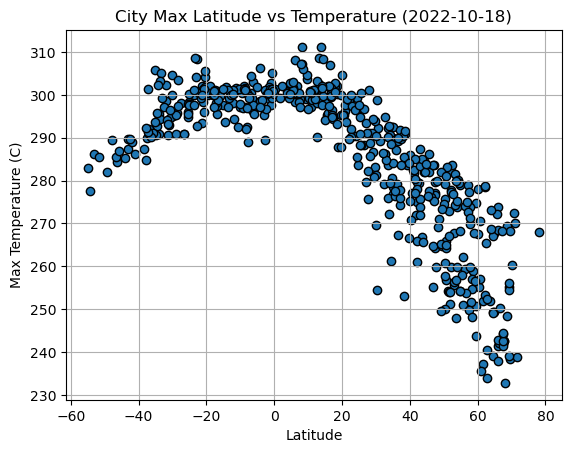

<Figure size 640x480 with 0 Axes>

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

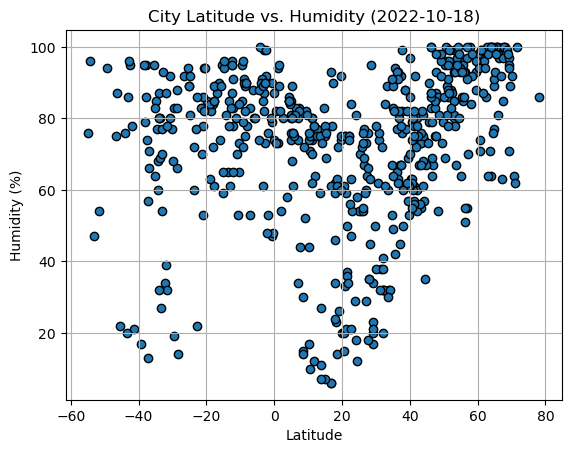

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df['Humidity'], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

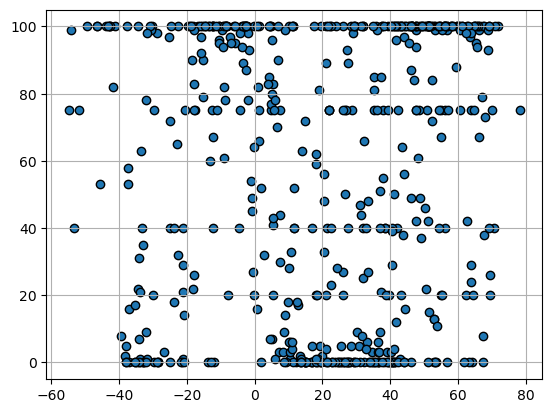

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df['Cloudiness'], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title = "City Max Latitude vs Temperature (2022-10-18)"
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness (%)"
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

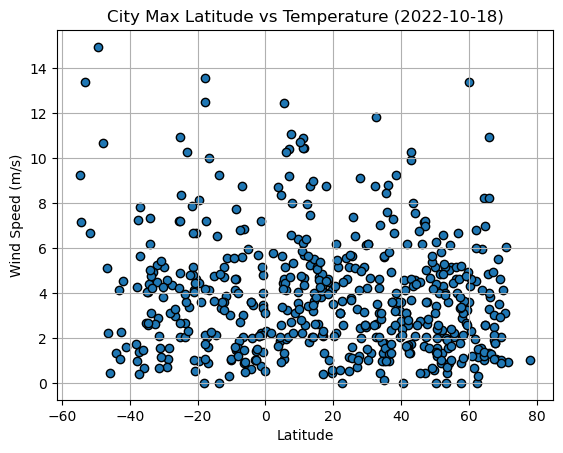

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
import scipy.stats as st

In [17]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,darchula,29.8412,80.5287,283.17,21,0,6.12,NP,1707681491
3,dongsheng,39.8161,109.9776,266.50,66,1,3.19,CN,1707681491
6,olonkinbyen,70.9221,-8.7187,270.21,63,100,6.06,SJ,1707681490
7,vadso,70.0744,29.7487,260.24,92,75,4.12,NO,1707681492
8,hawaiian paradise park,19.5933,-154.9731,295.39,94,100,4.12,US,1707681492


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <  0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,santo antonio,-6.3106,-35.4789,303.03,60,89,6.83,BR,1707681491
2,mount gambier,-37.8333,140.7667,284.77,96,1,0.96,AU,1707681257
4,waitangi,-43.9535,-176.5597,285.27,74,100,1.34,NZ,1707681491
5,tayu,-6.5397,111.0518,297.87,92,100,3.04,ID,1707681492
9,invercargill,-46.4000,168.3500,284.27,86,100,2.24,NZ,1707681492


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8711664171587447


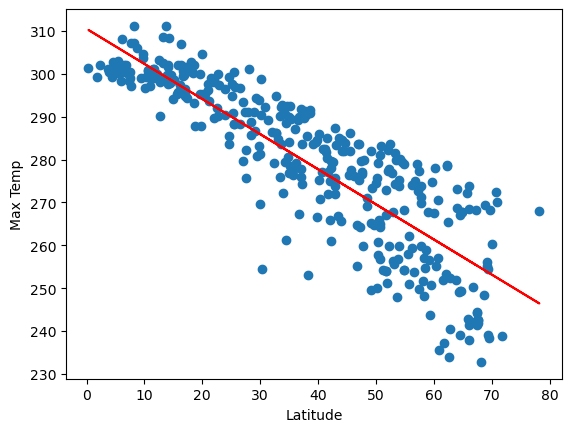

In [21]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.5989362885025695


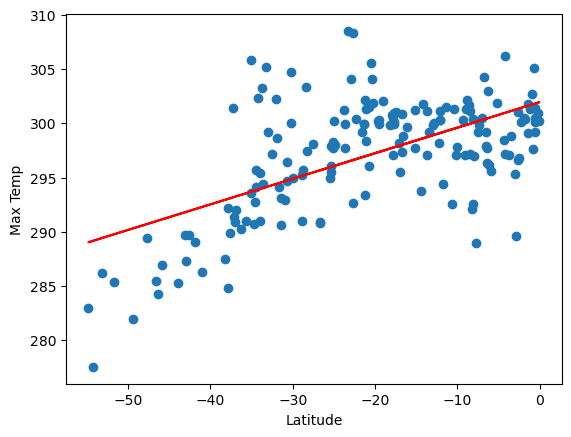

In [22]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** In the northern hemisphere, a negative value for the correlation coefficient (r) indicates a 'perfect correlation" between latitude and maximum temperasture.In the southern hemisphere there is a positive value for the (r) value meaning there is a 'perfect positive correlation' between latitude and Max Temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.49555151496223804


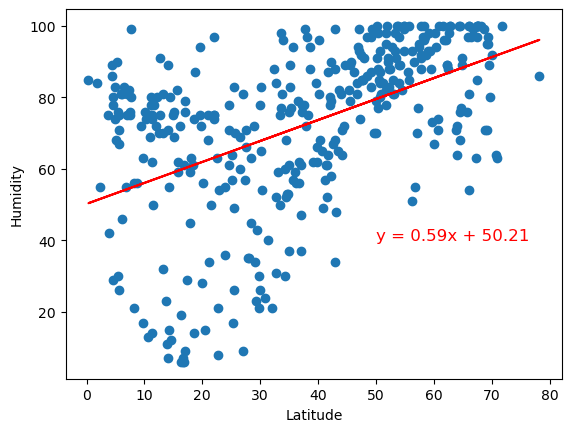

In [23]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.2986064595725632


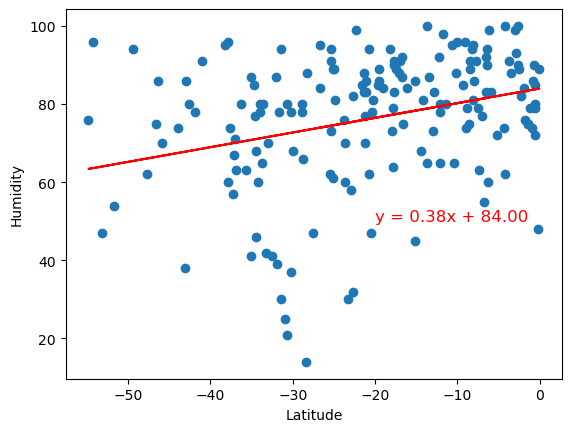

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** In the northern hemisphere, a positive value for the correlation coefficient (r) indicates a 'perfect positive correlation' between latitude and humidity. As well in the southern hemisphere there is a positive value for the (r) value meaning there is a 'perfect positive correlation' between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.38859907410196


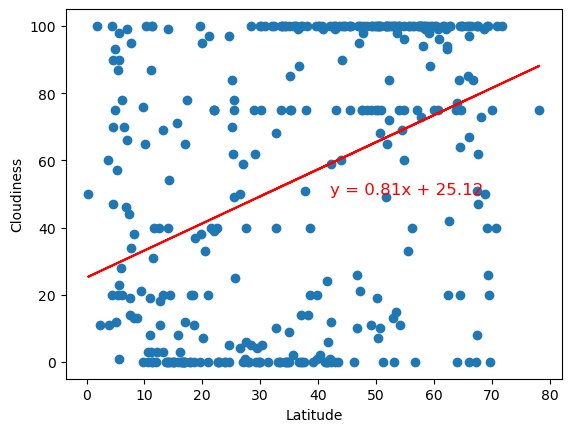

In [25]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.2352777951169714


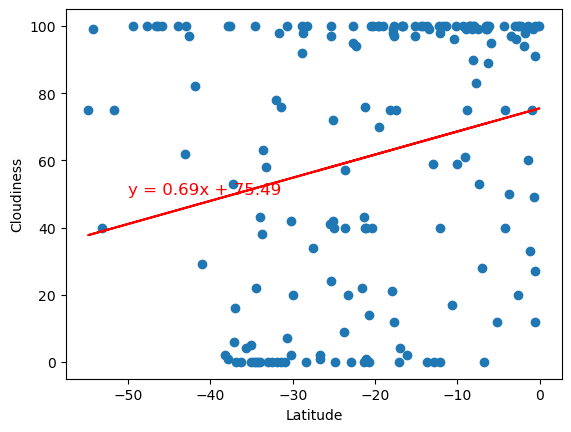

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** In this case both the northern and the southern hemisphere are indicating the value (r) is a 'perfect positive correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.21075968371115003


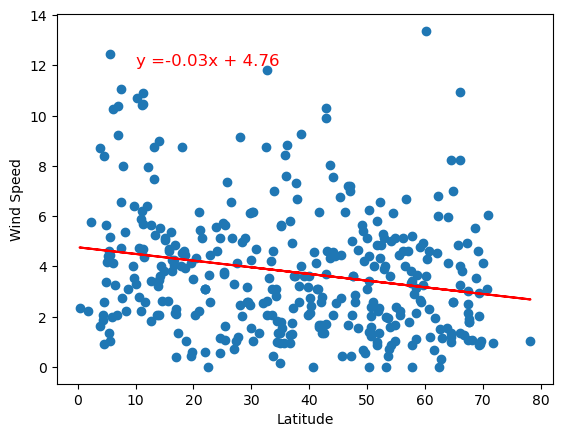

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.2243335554956958


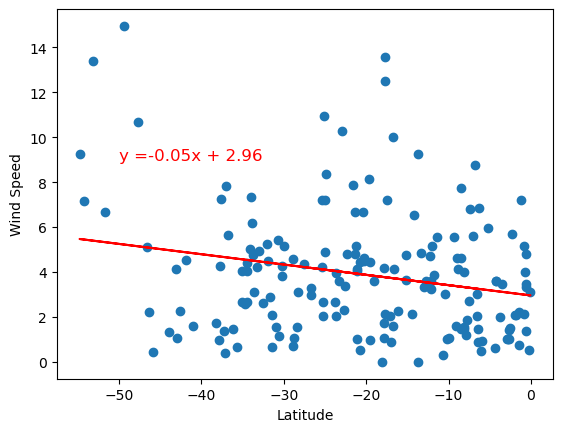

In [28]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** Both the northern and southern hemisphere are indicating a 'perfect positive correlation' for the latitude and wind speed .